# HW 18
## James Camacho

**Task:** Confirm the results of examples 7.4–7.6.

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

**7.4:** Euler's Method.

$$U^{n+1} = U^{n} + kf(U^n)$$

Given the test problem $u' = \lambda u$ we have

$$U^{n+1} = (1+z)U^{n},$$

where $z = k\lambda$. So to be stable we need $|1+z|\le 1$ which  is the closed disc of radius $1$ centered at $-1$.

**Confirming with code.**

We do a Monte-Carlo algorithm choosing values of $\lambda$ in $[-3, 3]\times [-3i, 3i].$ We always set $k$ to be $1$.

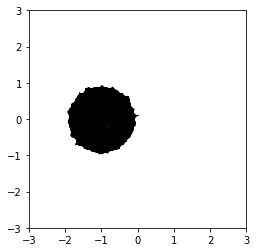

In [61]:
def test(f):
    u = 1
    error = 0.01
    v = 1 + error
    
    for i in range(10): # 10 steps
        u = u + f(u)
        v = v + f(v)
    return abs(u - v) <= error # Otherwise the error term is growing.

stable = []
unstable = []
for i in range(10000):
    l = np.random.random(2) @ [6, 6j] - (3 + 3j)
    def f(u):
        return l*u
    if test(f):
        stable.append(l)
    else:
        unstable.append(l)
        
sx = [s.real for s in stable]
sy = [s.imag for s in stable]
ux = [s.real for s in unstable]
uy = [s.imag for s in unstable]
        
plt.scatter(sx, sy, color="black")
plt.scatter(ux, uy, color="white")
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.gca().set_aspect('equal', adjustable='box')
plt.show();

**7.5:** Backward Euler

This method is

$$U^{n+1} = U^{n} + kf(U^{n+1}).$$

We're using the test function $f = \lambda u$ so we can solve directly for the next time step (rather than having to use Newton's method):

$$U^{n+1} = U^{n} + k\lambda U^{n+1}$$
$$\Longleftrightarrow$$
$$U^{n+1} = (1-z)^{-1}U^{n}.$$

This will be stable everywhere except the disc of radius $1$ centered at $1$.

**Confirming with code.**

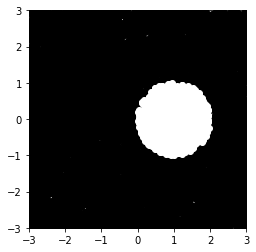

In [60]:
def test(f):
    u = 1
    error = 0.01
    v = 1 + error
    
    for i in range(10): # 10 steps
        u = f(u)
        v = f(v)
    return abs(u - v) <= error # Otherwise the error term is growing.

stable = []
unstable = []
for i in range(10000):
    l = np.random.random(2) @ [6, 6j] - (3 + 3j)
    def f(u):
        return u/(1-l)
    if test(f):
        stable.append(l)
    else:
        unstable.append(l)
        
sx = [s.real for s in stable]
sy = [s.imag for s in stable]
ux = [s.real for s in unstable]
uy = [s.imag for s in unstable]
        
plt.scatter(sx, sy, color="black")
plt.scatter(ux, uy, color="white")
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.gca().set_aspect('equal', adjustable='box')
plt.show();

**7.6:** Trapezoidal method.

This is

$$U^{n+1} = U^{n} + \frac{k}{2}\left[f(U^{n}) + f(U^{n+1})\right].$$

Again we use $f = \lambda u$. Directly solving for the next timestep gives

$$U^{n+1} = U^{n} + \frac{z}{2}\left[U^{n}+U^{n+1}\right]$$

$$\Longleftrightarrow$$

$$U^{n+1} = \frac{1+\frac{z}{2}}{1-\frac{z}{2}}U^n.$$

This is stable when

$$|2+z| \le |2-z|$$

i.e. $z$ has a negative real part.

**Confirming with code.**

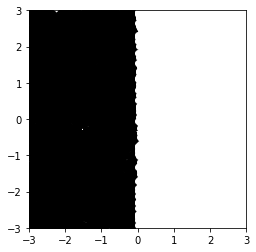

In [65]:
def test(f):
    u = 1
    error = 0.01
    v = 1 + error
    
    for i in range(10): # 10 steps
        u = f(u)
        v = f(v)
    return abs(u - v) <= error # Otherwise the error term is growing.

stable = []
unstable = []
for i in range(10000):
    l = np.random.random(2) @ [6, 6j] - (3 + 3j)
    def f(u):
        return u*(2+l)/(2-l)
    if test(f):
        stable.append(l)
    else:
        unstable.append(l)
        
sx = [s.real for s in stable]
sy = [s.imag for s in stable]
ux = [s.real for s in unstable]
uy = [s.imag for s in unstable]
        
plt.scatter(sx, sy, color="black")
plt.scatter(ux, uy, color="white")
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.gca().set_aspect('equal', adjustable='box')
plt.show();